In [1]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 1
%aimport load_data
from load_data import *

In [2]:
# Import Dataset
df_info, df_scripts = load_data()
df_docs_by_ep = agg_dialogue_by_episode(df_scripts, df_info)

In [5]:
df_scripts[df_scripts.Dialogue.str.contains("can we go")]

,Character,Dialogue,EpisodeNo,SEID,Season
131,GEORGE,"Right, can we go? Cause Im double-parked, Im g...",0.0,S01E00,1.0
17272,ELAINE,"(Catching another glimpse of Roy eating) Hunh,...",20.0,S04E20,4.0
19214,ELAINE,(pulling on Jerry's pants from the ground) Jer...,3.0,S05E03,5.0
48880,FRANKIE,"So, can we go for a ride?",5.0,S09E05,9.0


In [4]:
 main_chars = ['JERRY', 'GEORGE', 'ELAINE', 'KRAMER', 'NEWMAN']

In [5]:
# Lines for each char
def print_lines(df, main_chars):
    df = df.copy()
    for char in main_chars:
        char_lines = df[df.Character==char].Character.count()
        print(f"{char} has {char_lines:,.0f} lines in the entire series)")
        

print_lines(df_scripts, main_chars)

JERRY has 14,786 lines in the entire series)
GEORGE has 9,708 lines in the entire series)
ELAINE has 7,983 lines in the entire series)
KRAMER has 6,664 lines in the entire series)
NEWMAN has 640 lines in the entire series)


In [6]:
vals_to_append = [df_scripts.iloc[0,:].tolist()]

In [7]:
vals_to_append.append(df_scripts.iloc[1, :].tolist())

In [8]:
df_scripts.iloc[3, :]

Character                                     JERRY
Dialogue     You do of course try on, when you buy?
EpisodeNo                                         0
SEID                                         S01E00
Season                                            1
Name: 3, dtype: object

In [9]:
vals_to_append

[['JERRY',
  'Do you know what this is all about? Do you know, why were here? To be out, this is out...and out is one of the single most enjoyable experiences of life. People...did you ever hear people talking about We should go out? This is what theyre talking about...this whole thing, were all out now, no one is home. Not one person here is home, were all out! There are people tryin to find us, they dont know where we are. (on an imaginary phone) Did you ring?, I cant find him. Where did he go? He didnt tell me where he was going. He must have gone out. You wanna go out you get ready, you pick out the clothes, right? You take the shower, you get all ready, get the cash, get your friends, the car, the spot, the reservation...Then youre standing around, whatta you do? You go We gotta be getting back. Once youre out, you wanna get back! You wanna go to sleep, you wanna get up, you wanna go out again tomorrow, right? Where ever you are in life, its my feeling, youve gotta go.',
  0.0,
  

In [10]:
len(vals_to_append)

2

In [11]:
df_scripts.head()

,Character,Dialogue,EpisodeNo,SEID,Season
0,JERRY,Do you know what this is all about? Do you kno...,0.0,S01E00,1.0
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",0.0,S01E00,1.0
2,GEORGE,Are you through?,0.0,S01E00,1.0
3,JERRY,"You do of course try on, when you buy?",0.0,S01E00,1.0
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",0.0,S01E00,1.0


In [12]:
def get_jerry_df(df):
    df = df.copy()
    
    df.Character = df.Character.astype(str)
    df.Dialogue = df.Dialogue.astype(str)
    
    df = df[["Character","Dialogue"]].copy()
    
    char = 'JERRY'
    
    idx_first_line = df[df.Character==char].index[0]
    
    rows_appended = []
    new_df_cols = ["q_char", "q_dialogue", "a_char", "a_dialogue"]
    
    
    # lists to create new df - this "should" be much faster than appending to df at each row
    q_char_lst = [df.iloc[idx_first_line,0]]
    q_dialogue_lst = [df.iloc[idx_first_line,1]]
    a_char_lst = [df.iloc[idx_first_line+1,0]]
    a_dialogue_lst = [df.iloc[idx_first_line+1,1]]
    
    # Get first line and the line after
    rows_appended.append(idx_first_line)
    rows_appended.append(idx_first_line + 1)
    
    for index, row in df.iloc[idx_first_line + 2:, :].iterrows(): 
        index_before = index - 1
        
        if row.Character != char:
            continue
            
        q_char_lst.append(df.iloc[index_before,0])
        q_dialogue_lst.append(df.iloc[index_before,1])
        a_char_lst.append(df.iloc[index,0])
        a_dialogue_lst.append(df.iloc[index,1])

    df_jerry = pd.DataFrame(np.column_stack([q_char_lst, q_dialogue_lst, a_char_lst, a_dialogue_lst]), 
                               columns=new_df_cols)
    return df_jerry
        
df_get_jerry = get_jerry_df(df_scripts)
df_get_jerry.head(50)

,q_char,q_dialogue,a_char,a_dialogue
0,JERRY,Do you know what this is all about? Do you kno...,JERRY,"(pointing at Georges shirt) See, to me, that b..."
1,GEORGE,Are you through?,JERRY,"You do of course try on, when you buy?"
2,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",JERRY,"Oh, you dont recall?"
3,GEORGE,"(on an imaginary microphone) Uh, no, not at th...",JERRY,"Well, senator, Id just like to know, what you ..."
4,CLAIRE,"Its missing, I have to do it in my head decaf ...",JERRY,"Can you relax, its a cup of coffee. Claire is ..."
5,GEORGE,How come youre not doin the second show tomorrow?,JERRY,"Well, theres this uh, woman might be comin in."
6,GEORGE,"Wait a second, wait a second, what coming in, ...",JERRY,"I told you about Laura, the girl I met in Mich..."
7,GEORGE,"No, you didnt!",JERRY,"I thought I told you about it, yes, she teache..."
8,GEORGE,Ha.,JERRY,"(looks in the creamer) Theres no milk in here,..."
9,GEORGE,"Wait wait wait, what is she... (takes the milk...",JERRY,"Oh, shes really great. I mean, shes got like a..."


In [13]:
def parse_data_save_txt(df):
    outF = open("jerry_q_a.txt", "w")
    for index, row in df.iterrows():
        # write line to output file
        outF.write(row.q_dialogue)
        outF.write("\t")
        outF.write(row.a_dialogue)
        outF.write("\n")
    outF.close()
parse_data_save_txt(df_get_jerry)

In [21]:
data_path = 'jerry_q_a.txt'


def load_in_txt(data_path):
    num_samples = 16000
    
    # Vectorize the data.
    input_texts = []
    target_texts = []
    input_characters = set()
    target_characters = set()
    with open(data_path, 'r') as f: #, encoding='utf-8'
        lines = f.read().split('\n')
        
    for line in lines[: min(num_samples, len(lines) - 1)]:
        input_text, target_text = line.split('\t')
        # We use "tab" as the "start sequence" character
        # for the targets, and "\n" as "end sequence" character.
        target_text = '\t' + target_text + '\n'
        input_texts.append(input_text)
        target_texts.append(target_text)
        for char in input_text:
            if char not in input_characters:
                input_characters.add(char)
        for char in target_text:
            if char not in target_characters:
                target_characters.add(char)
             
    input_characters = sorted(list(input_characters))
    target_characters = sorted(list(target_characters))
    num_encoder_tokens = len(input_characters)
    num_decoder_tokens = len(target_characters)
    max_encoder_seq_length = max([len(txt) for txt in input_texts])
    max_decoder_seq_length = max([len(txt) for txt in target_texts])
    
    avg_encoder_seq_length = np.mean([len(txt) for txt in input_texts])
    avg_decoder_seq_length = np.mean([len(txt) for txt in target_texts])
    
    print(f"There are {num_encoder_tokens} unique encoder tokens")
    print(f"There are {num_decoder_tokens} unique decoder tokens")
    print(f"The max encoder seq length is {max_encoder_seq_length}")
    print(f"The max decoder seq length is {max_decoder_seq_length}")
    
    print(f"The avg encoder seq length is {avg_encoder_seq_length}")
    print(f"The avg decoder seq length is {avg_decoder_seq_length}")
    
    print(f"The last line is {target_texts[-1]}")
    
    return input_texts, input_characters, target_texts, target_characters
    
    
input_texts, input_characters, target_texts, target_characters = load_in_txt(data_path)

There are 89 unique encoder tokens
There are 88 unique decoder tokens
The max encoder seq length is 1884
The max decoder seq length is 1886
The avg encoder seq length is 55.0401082177883
The avg decoder seq length is 53.98376733175516
The last line is 	Alright, hey, you've been great! See you in the cafeteria.



In [22]:
import re, string, timeit

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
string.punctuaion = '''["#$%&\'()*+,-/:;<=>@[\\]^_`{|}~]'''

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
punct = '''["#$%&\'()*+,-/:;<=>@[\\]^_`{|}~]'''

In [27]:
import re

In [56]:
max_sent_length = 50

In [57]:
cleaned_input_texts = []
for val in input_texts:
    val = re.sub("[\(\[].*?[\)\]]", "", val).lstrip()
    val = ''.join(ch for ch in val if ch not in punct)
    sent = ""
    for char in val:
        if char != '!' and char != '?' and char != '.':
            sent += char
        else:
            sent += char
            break
    cleaned_input_texts.append(sent[:max_sent_length])

In [58]:
cleaned_target_texts = []
for val in target_texts:
    val = re.sub("[\(\[].*?[\)\]]", "", val).lstrip()
    val = ''.join(ch for ch in val if ch not in punct)
    sent = ""
    for char in val:
        if char != '!' and char != '?' and char != '.':
            sent += char
        else:
            sent += char
            break
    cleaned_target_texts.append(sent[:max_sent_length])

In [70]:
end_punc = '''!.?'''

In [75]:
counter = 0
for sent in cleaned_target_texts:
    print(sent)
    if sent[-1] not in end_punc:
        counter += 1
counter

See to me that button is in the worst possible spo
You do of course try on when you buy?
Oh you dont recall?
Well senator Id just like to know what you knew an
Can you relax its a cup of coffee.
Well theres this uh woman might be comin in.
I told you about Laura the girl I met in Michigan?
I thought I told you about it yes she teaches poli
Theres no milk in here what.
Oh shes really great.
Oh nothing happened you know but is was great.
Yeah.
Yeah.
Yeah well.
Yeah but.
Yeah!
What are you serious.
To be polite?
Yes!
Oh I get it this is about the button.
Oh you are beautiful!
Good.
Oh come on be a comewith guy.
Well look at this guy.
And you didnt even hear how she sounded.
Laura.
Yeah but how could you be so sure?
No.
Yeah.
Maybe youre right.
This is insane.
No no no dont interrupt the cycle.
You you cant overdry.
Same as you cant overwet.
How could she not tell me where she was staying?
Laundry day is the only exciting day in the life o
If you know what happened in the Met game dont say

Whats with you two?
Tell me what?
Completely naked?
OK just a second lets not lose our heads here.
Youll sense it.
Well what happened?
You didnt get my papers?
Well where is she?
Why is it so difficult uncomfortable to be naked.
A mental institution?
You know I hate to raise a crass financial concern
So what now?
Can we go out there?
Woodhaven.
My cousin Douglas was in a place like this one tim
Thatd be great.
Tuberculosis

Leroy

Tuberculosis

Want want?
Just chatting.
Its one stupid thing after another.
Hes never guiled.
there are no copies.
Who makes copies?
Yes Im trying to get a copy of a receipt for a com
Anybody want to take a walk down to 48th street?
George?
Youre going by 48th St.
I was audited last year.
I have never seen an old person in a new bathing s
Hey theres the old man!
Ahh we waited 35 minutes in the rentacar place.
Whats the difference?
I dont wanna use your car.
Nothing.
So what would you do?
I dont know.
Oh I didnt get the insurance.
Youre not paying for it.
God 

Did he kiss you good night?
What do you mean you dont know?
Well what kind of a kiss?
So you like him.
Ah Im jealous of everybody.
hello.
That was Keith.
He wants me to help him move.
You know furniture.
I said yes but I dont feel right about it.
Well we went out one time.
Keith Hernandez just asked me to help him move.
I said yes.
Im NOT DRIVING HIM TO THE AIRPORT!
hey Kramer do me a favour .
Dont mention it to anybody.
She likes him I mean she really likes him.
Who wouldnt like him?
Forget that.
You know I know this sounds a little arrogant but 
Really?
I dont know  six three.
So I guess its fair to say youve set different goa
Oh yeah.
DeSoto?
Oh.
No I cant Ive got some stuff to do then Ive got to
I know isnt that something?
I dont know  hes got some valuable antiques Hes wo
IM NOT DRIVING HIM TO THE AIRPORT!
Is there a box spring?
Is there a box spring?
Is that a sectional?
Is that a thick marble?
STAIRS?
Im sorry I cant do this.
I told you!
But why?
Hello  oh hi Elaine .
You just m

Lord of the manor.
What?
Really?
Good one.
But the question is are you still master of your d
Alright Ma Ill talk to you later.
The wheels on the bus go round and round round and
I dont keep real coffee in here I get my coffee on
Come on up!
I dont know.
How are these your socks?
Oh yeah thats right well you fell asleep one day o
Theyre my socks!
What are we doing here.
This is ridiculous.
I havent been myself lately.
Its over?
OhhmyGod.
What happened?
But you made it through the day before.
Why outside here?
Alright Costanza  its just you and me.
Really?
You sure?
You really want to?
Okay.
You dont know the half of it.
Well its kinda silly but.
No it was just a bet.
I told her about the contest.
Marla?
Oh my God in heaven!
Hey could you do me a favour?
I hate rental cars.
So this worked out pretty good.
And heres the beauty

George is pickin us up at the airport.
You know that awning outside my building?
Hes always bragging about his vertical leap so I b
He didnt come within two feet 

You dont even know what paba is.
Ill go if someone else drives.
Youre bringing a date to a party?
A party is a bad date situation.
Well I would think with the law enforcement and th
That woman is absolutely stunning.
Not the Croat the lineswoman.
B.
I cant take my eyes off that lineswoman.
I gotta talk to her.
Im going to psyche myself into it like those peopl
I have to.
I cant.
I dont know Hi.
Excuse me.
Im not saying shes deaf shes deaf.
Cant hear a thing.
Yeah isnt that something?
Really?
I met this deaf lineswoman at the tennis match.
Wow good plan.
Thats nice.
Thats nice for the freaks.
Why dont you get him some tickets or something how
Kramer I think perhaps youve overlooked one of the
All right Ill talk to her.
But I thought things were going great.
Did she say why?
But thats your routine.
So she sees you with hot fudge on your face and sh
Hello.
Yeah.
He thinks Gwen broke up with him because she saw h
Well if a couple breaks up and have plans to go to
I think she should withdra

You dont think shes attractive?
Okay Newman thanks a lot.
No thank you.
But its just a friendly game.
What are you so worried about this for?
He did?
So it had nothing to do with you.
No I dont think so.
Hey let me ask you a question.
Yeah and the curls.
Yeah me too.
Where you going?
Youre going to see Genderson?
You had how many dates with him?
And .
What?
Why are you looking at my face?
Where am I going to look?
.
Newman!
All I could think of was when I was looking at her
Youre going out with the stationery store guy?
Hello what?
Your friend Noreen.
If I was flattering myself I think Id come up with
If you dont believe me ask her.
Oh right.
Check the pile.
I dont know.
Oh.
Isnt that cute a thank you card from Kristin.
She works for PBS I met her when I agreed to do th
Yeah in fact she said that you could be one of tho
No its not aluminum siding its volunteer work.
Yeah and one of those foam beer can holders.
Oh go ahead.
Like shes really going to admit she was flirting w
So was I rig

IndexError: string index out of range

In [77]:
for sent in target_texts:
    print(sent)

	(pointing at Georges shirt) See, to me, that button is in the worst possible spot. The second button literally makes or breaks the shirt, look at it. Its too high! Its in no-mans-land. You look like you live with your mother.

	You do of course try on, when you buy?

	Oh, you dont recall?

	Well, senator, Id just like to know, what you knew and when you knew it.

	Can you relax, its a cup of coffee. Claire is a professional waitress.

	Well, theres this uh, woman might be comin in.

	I told you about Laura, the girl I met in Michigan?

	I thought I told you about it, yes, she teaches political science? I met her the night I did the show in Lansing...

	(looks in the creamer) Theres no milk in here, what...

	Oh, shes really great. I mean, shes got like a real warmth about her and shes really bright and really pretty and uh... the conversation though, I mean, it was... talking with her is like talking with you, but, you know, obviously much better.

	Oh, nothing happened, you know, but


	Wow! That's the astronaut pen. I heard about that. Where did you get it?

	Cause sometimes I write in bed and I have to turn and lean on my elbow to make the pen work.

	Oh no.

	I couldn't

	I can't take it.

	No, I'm not...

	I cannot take it!

	Are you sure?

	O.K. Thank you very much. Thank you. Gee, boy!

	Thanks again.

	What he gave it to me.

	He offered it to me.

	I liked it. Should I have said I didn't like it?

	He could have said "Thank you, I like it too" and put it back in his pocket.

	If he likes it so much, he never should have offered it.

	Well, he was wrong.

	So you want me to return it?

	Hey I don't even want the pen now!

	Are you O.K. in here?

	It's only for three days. Today's over and we have tommorow. We leave on Sunday. It's one day, really.

	Oh you wanna switch? I'm sleeping on a love seat. I've got my feet up in the air like I'm in a space capsule.

	Oh, no don't say that. You'll jinx me.

	They're nuts with temperature.

	How about that guy writing 

	Entertainment Tonight's on.

	Bedroom.

	What's it like out?

	Can I take a sweater?

	Scarf?

	What's the matter? What's going on?

	What is wrong?!

	Get together?

	Yeah.

	What car?

	Yeah who?

	The blond with the blue sweatpants! Yeah, I think I've seen her.

	The blond with the blue sweatpants!

	I've had a crush on this woman for year! I've always been afraid to approach her! She looks like she belongs on one of these Hallmark cards.

	Oh yeah. Too bad. Angela. Lousy thug. I mean what kind of sick person does something like that? That woman belongs in prison! I mean, I actually owe it to society to do something about this! I can't sit by and allow this to go on. It's a moral issue is what it is!

	How am I going to live with myself?!

	I'm not religious, but I certainly know where to draw the line!

	Don't sell yourself short saying 'God bless you' to every Tom, Dick and Harry in great personal risk.

	There should be more people like us.

	You're telling me.

	Anyway, I just 


	Alright, alright. Just let me finish my coffee... then we'll watch 'em go slice this fat bastard up. (sips coffee)

	What are you eating?

	No...

	Where'd you get those?

	No.

	I don't want one.

	I don't want any!

	No! Stop it! Kramer, stop it!

	(pointing at the operation he mouths the words) Did it go in?

	...Over the balcony, bounced off some respirator thing *into* the patient!

	Into the patient, *literally*!

	Yes, the hole!

	No!

	Because it's a little mint. It's a *Junior* Mint.

	They sealed him up with the mint inside.

	Yes!

	Yes they *eat* them. They don't put them next to vital organs in their abdominal cavity!

	Yeah.

	Come on up.

	Why did you force that mint on me? I told ya I didn't want the mint!

	How could you not believe me?!?

	That's true.

	Well, just don't say anything about this to Elaine...

	Prognosis *negative*!?

	We gotta confess.

	Yes!

	I can't have this on my conscience. We're like Leopold and Loeb! **

	I'm telling and you can't stop me!

	

	Oh, is this a bit?

	(turns to greet Kramer) Hey.

	Really! You know, a lot of restaurants are serving brewed decaf now, too.

	Oh, you'll have a good time, I swear.

	Good, good.

	Yeah, why don't you guys get a table so you'll have good seats?

	Yeah.

	O.k., good, I'll see you later. (Kramer and Toby are about to exit. She turns around and clutches Kramer's jacket.)

	Men definitely hit the remote button more than women...

	Yes, yeah...see, men don't care what's on TV, men only care what else is on TV.

	...that's why men hunt and women nest.

	Yea, ya, so...anyway what was I talking about.

	Hey, what's the deal? What was goin' on there? I invite you down here, I have an important show, and she heckles me?!

	Well, what is the matter with her? Is she crazy?!

	Hey! What is wrong with you?!

	Y-You boo me?! You hiss?! You didn't stop blathering throughout the whole set!

	No! Not part of the show! Booing and hissing are not part of the show! You boo puppets! You hiss villains in s


	He used to go there a lot on business.

	He sold religious articles the statues of Jesus, the virgin Mary, that were manufactured in Korea.

	George, does your father speak Korean?

	Oh, hi Gennice.

	This is George, this is Kramer.

	Playing today?

	They really stick to that understudy rule.

	It's okayit's just a hot dog, (still sobbing) everything is going to be okay.

	Come on George, just loosen up.

	Come on George.

	(to George) Keep going.

	Well we

	(with no emotion) It's okay. Everything is going to be all right.

	Come back another time.

	I don't know why I have to go to the hospital. I didn't do anything to Bette Midler. Driver can you stop over here, we're picking somebody up.

	Hey, I'm being heckled on stage. People are yelling out Galloogy.

	Stop your crying will ya?

	Hey, I had nothing to do with it.

	We just want to talk to her. We want to apologize and tell her the whole thing was an accident.

	What?

	What happened?

	Oh,, that's nice. Alright, I'll see you

	Why do you invite these women over if they annoy you so much?

	C'mon, you want to have a baby.

	It's the life force. I saw a show on the mollusk last night. Elaine, the mollusk travels from Alaska to Chile just for a shot at another mollusk. You think you're any better?

	How long did you leave it up there?

	Play the tape, maybe we'll get a clue.

	Is that it?

	What do you make of it?

	So, what's on your mind?

	Pam? What about Pam?

	You what?

	Is that right?

	What does that mean?

	What about her name?

	She's got really nice hair.

	You've got really specific tastes.

	She's got nice calves.

	Maybe I could, you're making some pretty good points.

	But I might.

	Why not? The voice? The calves? The bacon?

	I think I can! I even like the name! Pam!

	Pam!

	Pam!

	That Pam! I am ga-ga over her!

	Yesterday. Six-ish.

	You just met the guy yesterday.

	A barren, sterile existence that ends when you die?

	Elaine, a guy'll say anything to get a woman.

	I once told a woman tha


	What is this?

	I thought you were gonna watch a video.

	Kramer, I'm not in a mood for this.

	Blood over there, sausages over here. I'm living in a slaughter house.

	No they're not mine Mr. Mandelbaum...

	So, the free love buffet is over?

	Yeah, that's what you did...I can't believe I got another session with Izzy Mandelbaum, he's probably makes me box a kangaroo.

	What's going on?

	Oh no, I'll tell you what you did Caligula; you combined food and sex in to one disgusting uncontrollable urge.

	No, but please tell me that's all you're gonna do with it.

	All right, that's enough of that. (Jerry takes the plates and hands them to a waitress.)

	Well, sleepy here is quite a weasel, maybe he can bat for you.

	It wasn't me, it was Mr. Mandelbaum.

	What's wrong with yours?

	All right, but this is it, this is the last favor, we're even!

	Is this really necessary?

	What if I can't keep up?

	What's going on?

	Oh my God, the blood!

	Well, for the first quarter mile they thought

In [59]:
np.mean([len(txt) for txt in cleaned_target_texts])

22.75840378762259

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


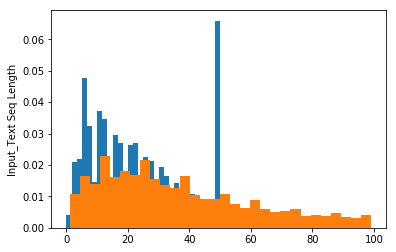

In [60]:
x = [len(txt) for txt in cleaned_input_texts if len(txt) < 100]
y = [len(txt) for txt in input_texts if len(txt) < 100]
plt.hist(x, normed=True, bins=30)
plt.hist(y, normed=True, bins=30)
plt.ylabel('Input_Text Seq Length');

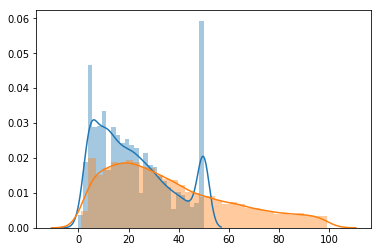

In [61]:
import seaborn as sns
sns.distplot(x)
sns.distplot(y)

In [36]:
input_texts[-100:]

["Jerry, I'm on the other line.",
 "I'm sorry, Jill. I'm going to have to take this call. Jerry, what's the emergency?",
 "That's the emergency?",
 'I was on the other line talking to Jill.',
 'You said it was an emergency.',
 'Jerry, you ever watch that?',
 "Nothing. Please. I'll tell you the truth - the whole thing sounds pretty stupid to me.",
 'Oh hey!',
 'Oh, you missed it, buddy - lot of femininas - some major femininas',
 "You know, I went swimming and I can't get this water out of my ear.",
 "You're moving to California?",
 "Yeah, but Jerry, what happens if the show's a hit? You could be out there for years! You might never come back.",
 "Jerry. It's L.A. Nobody leaves. She's a seductress, she's a siren, she's a virgin, she's a whore.",
 'So we can go anywhere we want?',
 'Why are they doing this?',
 'Oh - I got it - how about Russia?',
 "It's not bleak - it's springtime.",
 "You can't be bleak in spring.",
 'All right! You know what, just forget it!',
 'Oh yeah - oui oui.',
 "

In [232]:
target_characters

['\t',
 '\n',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '>',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


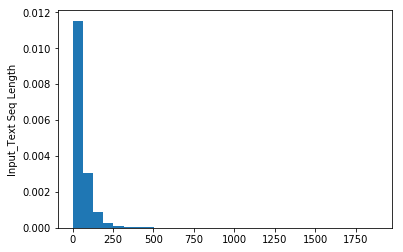

In [228]:
x = [len(txt) for txt in input_texts]
plt.hist(x, normed=True, bins=30)
plt.ylabel('Input_Text Seq Length');

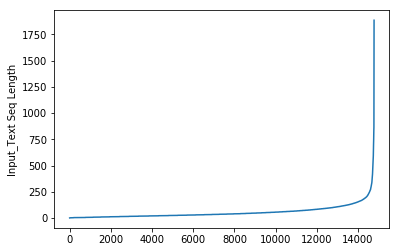

In [229]:
x = sorted(x)
plt.plot(x)
plt.ylabel('Input_Text Seq Length');

In [226]:
df_scripts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54606 entries, 0 to 54605
Data columns (total 5 columns):
Character    54606 non-null object
Dialogue     54606 non-null object
EpisodeNo    54606 non-null float64
SEID         54606 non-null object
Season       54606 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.1+ MB


In [202]:
df_get_jerry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14785 entries, 0 to 14784
Data columns (total 4 columns):
q_char        14785 non-null object
q_dialogue    14785 non-null object
a_char        14785 non-null object
a_dialogue    14785 non-null object
dtypes: object(4)
memory usage: 462.1+ KB


In [203]:
new_df.head()

,q_char,q_dialogue,a_char,a_dialogue
0,JERRY,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [204]:
df_scripts[df_scripts.Character=='JERRY']

,Character,Dialogue,EpisodeNo,SEID,Season
0,JERRY,Do you know what this is all about? Do you kno...,0.0,S01E00,1.0
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",0.0,S01E00,1.0
3,JERRY,"You do of course try on, when you buy?",0.0,S01E00,1.0
5,JERRY,"Oh, you dont recall?",0.0,S01E00,1.0
7,JERRY,"Well, senator, Id just like to know, what you ...",0.0,S01E00,1.0
11,JERRY,"Can you relax, its a cup of coffee. Claire is ...",0.0,S01E00,1.0
14,JERRY,"Well, theres this uh, woman might be comin in.",0.0,S01E00,1.0
16,JERRY,"I told you about Laura, the girl I met in Mich...",0.0,S01E00,1.0
18,JERRY,"I thought I told you about it, yes, she teache...",0.0,S01E00,1.0
20,JERRY,"(looks in the creamer) Theres no milk in here,...",0.0,S01E00,1.0


In [207]:
df_get_jerry[df_get_jerry.q_char=='JERRY']

,q_char,q_dialogue,a_char,a_dialogue
0,JERRY,Do you know what this is all about? Do you kno...,JERRY,"(pointing at Georges shirt) See, to me, that b..."
36,JERRY,Laundry day is the only exciting day in the li...,JERRY,"(answering, quickly) If you know what happened..."
37,JERRY,"(answering, quickly) If you know what happened...",JERRY,(to the door) Yeah?
50,JERRY,"No, its, its just my neighbour... Um... Yeah, ...",JERRY,If my father was moving this hed had to have a...
62,JERRY,The dating world is not a fun world...its a pr...,JERRY,Wouldnt it be great if you could ask a woman w...
86,JERRY,"(unenthusiastic) Yeah, we could do that...why ...",JERRY,"(answering) Yeah, hello...yes...yes, she is, h..."
92,JERRY,Me too!,JERRY,"I swear, I have absolutely no idea what women ..."
93,JERRY,"I swear, I have absolutely no idea what women ...",JERRY,"So, Im on line at the supermarket. Two women i..."
95,JERRY,"Cheque. Now, the fact is, if its a woman in fr...",JERRY,Whats that one?
137,JERRY,(thinking) I cant believe it. I got nothing! I...,JERRY,"That wasnt so bad, really."


In [147]:
df_scripts.iloc[-1:, :]

,Character,Dialogue,EpisodeNo,SEID,Season
54615,JERRY,"Alright, hey, you've been great! See you in th...",23.0,S09E23,9.0


In [192]:
before_jerry[before_jerry.Character=="GEORGE"]

,Character,Dialogue,q_a


In [20]:
def parse_data_save_txt(df, main_chars):
    pass